# E-commerce Fraud Detection Analysis

## 1. Exploratory Data Analysis

### Read CSV and understand data format

In [50]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# datafiles
glob.glob('./data/*')

['./data\\sample_submission.csv',
 './data\\test_identity.csv',
 './data\\test_transaction.csv',
 './data\\train_identity.csv',
 './data\\train_transaction.csv']

In [52]:
df_id = pd.read_csv('./data/train_identity.csv')
df_transaction = pd.read_csv('./data/train_transaction.csv')

### Identity Table

There are 41 columns in this table, including different 
identity information such as network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. These data is collected by Vesta’s fraud protection system and digital security partners. Field names are masked for privacy reasons.

Categorical Features:
- DeviceType
- DeviceInfo
- id12 - id38

In [53]:
df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [54]:
len(df_id.columns)

41

### Transaction Table

There are 394 columns in this table. The organization provided additinoal explanation regarding these variables.
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features:
- ProductCD
- card1 - card6
- addr1, addr2
- Pemaildomain Remaildomain
- M1 - M9

In [55]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
len(df_transaction.columns)

394

### Data Exploration

In [57]:
df = df_id.join(df_transaction.set_index('TransactionID'), on='TransactionID')

Out of 590,540 data records, only ~3.5% are fraud transactions. It is very likely to encounter inbalanced classes in fraud detection problems. We will experiment with different ways to handle this, including various data sampling methods and using non-accuracy measures to evaluate model.

In [58]:
'Total number of Transactions', len(df_transaction.isFraud)

('Total number of Transactions', 590540)

('Ratio of fradulent transactions', 0.03499)

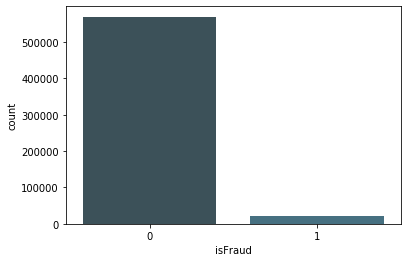

In [59]:
sns.set_palette('GnBu_d')
sns.countplot(x = 'isFraud', data = df_transaction)
'Ratio of fradulent transactions'\
, round(sum(df_transaction.isFraud)/ len(df_transaction.isFraud),5)

In [ ]:
# Understand feature importance in the model

feature_imp = pd.DataFrame(sorted(zip(model2.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('XGB95 Most Important Features')
plt.tight_layout()
plt.show()

#### Cross validation framework setup for hyperparameters tuning

In [ ]:
# also set up cross validation framework for hyperparameters tuning
cv_scores = cross_validate(model2, X, y, cv =3 , scoring=('roc_auc')\
                           , return_train_score=True)

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# LGBM Classifier

In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import gc, datetime, random
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

### Data Preprocessing


1) Preprocessing applied to all files: - Features with > 90% data missing or > 90% data with the same value were dropped - If possible, categorical variables with 100s of categories were mapped to coaser categoricals - Correlation plot analysis done on "V" columns and columns were dropped reduce collinearlity - https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id - Some "D" columns were normalized for time - Aggregate features were added using "magic" technique - https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600#How-the-Magic-Works - Dropped TransactionID and TransactionDT

2) Specific preprocessing applied based on classifiers:

#### Response variable
y_train.pkl
- contains binary fraud/notfraud response for training dataset

#### cleanLGBM.zip

LGBM_{train, test}_X_1.pkl

- Full 200 features from output of 1) above
- No dummy creation
    
LGBM_{train, test}_X_2.pkl

- Removed additional features
        - Highly correlated "C", "D" features
        - Removed features Chris (1st place winners) removed
        - Removed caterogical features withh 200+ categories even after 1)
- No dummy creation
    
LGBM_{train, test}_X_3.pkl

- Exact same as LGBM_{train, test}_X_1.pkl except NAs filled with -999
    
LGBM_{train, test}_X_4.pkl

- Exact same as LGBM_{train, test}_X_2.pkl except NAs filled with -999

In [3]:
# Response isFraud for training data
infile = open('train_y.pkl','rb')
trainY_data = pickle.load(infile)
infile.close()

In [4]:
# Full 200 features with categorical features
infile = open('LGBM_train_X_1.pkl','rb')
trainX1_data = pickle.load(infile)
infile.close()

In [5]:
# Full 200 features without categorical features
infile = open('LGBM_train_X_2.pkl','rb')
trainX2_data = pickle.load(infile)
infile.close()

In [6]:
# Full 200 features with categorical features and N/A replaced with -999
infile = open('LGBM_train_X_3.pkl','rb')
trainX3_data = pickle.load(infile)
infile.close()

In [7]:
# Full 200 features without categorical features and N/A replaced with -999
infile = open('LGBM_train_X_4.pkl','rb')
trainX4_data = pickle.load(infile)
infile.close()

In [8]:
infile2 = open('LGBM_test_X_3.pkl','rb')
testX3_data = pickle.load(infile2)
infile2.close()

In [9]:
trainX1_data.shape

(590540, 200)

In [10]:
trainX1_data.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,D9_card1_addr1_mean,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,...,-1.000000,-1.000000,-1.000000,-1.000000,36.591064,245.096771,-1.000000,-1.000000,-1.000000,-1.000000
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,...,0.587087,0.304250,0.568182,0.279678,-15.737109,239.606186,-10.476201,240.390656,122.008369,259.420959
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,0.180555,0.312731,0.180555,0.312731,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,...,0.502091,0.344820,0.500888,0.342004,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,0.020833,0.029462,0.000000,-1.000000,-55.242935,227.626068,-37.553299,239.139923,-1.000000,-1.000000


In [13]:
testX3_data.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,D9_card1_addr1_mean,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std
0,-45.0,280290.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,100.0,NotFound,...,0.489465,0.344575,0.494866,0.344653,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.0,3579.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,Found,...,0.609375,0.375289,0.609375,0.375289,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
2,-5.0,185210.0,-999.0,-999.0,1.0,0.0,-999.0,-999.0,100.0,NotFound,...,0.489465,0.344575,0.550251,0.350781,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
3,-45.0,252944.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,0.489465,0.344575,0.494866,0.344653,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0
4,-95.0,328680.0,-999.0,-999.0,7.0,-33.0,-999.0,-999.0,100.0,NotFound,...,0.498389,0.341319,0.492810,0.339882,-220.265182,-1.0,-1.0,-1.0,-1.0,-1.0


In [14]:
trainY_data.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [15]:
for c in trainX1_data.columns:
    col_type = trainX1_data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        trainX1_data[c] = trainX1_data[c].astype('category')
trainX1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 200 entries, id_01 to D11_card1_addr1_P_emaildomain_std
dtypes: category(29), float32(26), float64(142), int32(2), int64(1)
memory usage: 729.4 MB


In [16]:
for c in trainX2_data.columns:
    col_type = trainX2_data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        trainX2_data[c] = trainX2_data[c].astype('category')
trainX2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 171 entries, id_01 to D11_card1_addr1_P_emaildomain_std
dtypes: category(20), float32(26), float64(122), int32(2), int64(1)
memory usage: 633.0 MB


In [17]:
for c in trainX3_data.columns:
    col_type = trainX3_data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        trainX3_data[c] = trainX3_data[c].astype('category')
trainX3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 200 entries, id_01 to D11_card1_addr1_P_emaildomain_std
dtypes: category(29), float32(26), float64(142), int32(2), int64(1)
memory usage: 729.4 MB


In [18]:
for c in trainX4_data.columns:
    col_type = trainX4_data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        trainX4_data[c] = trainX4_data[c].astype('category')
trainX4_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 171 entries, id_01 to D11_card1_addr1_P_emaildomain_std
dtypes: category(20), float32(26), float64(122), int32(2), int64(1)
memory usage: 633.0 MB


In [19]:
# Splitting the dataset into the Training set and Test set
seed = 123
test_size = 0.3
X1_train, X1_test, y1_train, y1_test = train_test_split(trainX1_data, trainY_data, test_size = test_size, random_state = seed)

In [20]:
# Splitting the dataset into the Training set and Test set
seed = 123
test_size = 0.3
X2_train, X2_test, y2_train, y2_test = train_test_split(trainX2_data, trainY_data, test_size = test_size, random_state = seed)

In [21]:
# Splitting the dataset into the Training set and Test set
seed = 123
test_size = 0.3
X3_train, X3_test, y3_train, y3_test = train_test_split(trainX3_data, trainY_data, test_size = test_size, random_state = seed)

In [22]:
# Splitting the dataset into the Training set and Test set
seed = 123
test_size = 0.3
X4_train, X4_test, y4_train, y4_test = train_test_split(trainX4_data, trainY_data, test_size = test_size, random_state = seed)

In [23]:
# Finding the columns of categorical features

def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
column_index(X1_train, ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])

array([ 9, 12, 13, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 35,
       37, 41, 42, 70, 71, 72, 73, 74, 75, 76, 77, 78], dtype=int64)

In [24]:
#NOT run yet


# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = preprocessing.StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [25]:
#le = preprocessing.LabelEncoder()
#le.fit(['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'])
#LabelEncoder()

In [26]:
#Converting our training data into LightGBM dataset format

d_train1 = lgb.Dataset(X1_train, label=y1_train)
d_train2 = lgb.Dataset(X2_train, label=y2_train)
d_train3 = lgb.Dataset(X3_train, label=y3_train)
d_train4 = lgb.Dataset(X4_train, label=y4_train)

In [27]:
params = {'num_leaves': 546,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.1797454081646243,
          'bagging_fraction': 0.2181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.005883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'binary_logloss',
          "verbosity": -1,
          'reg_alpha': 0.3299927210061127,
          'reg_lambda': 0.3885237330340494,
          'random_state': 42,
          'categorical_feature' : 'auto'
}
#[9, 12, 13, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 35,37, 41, 42, 70, 71, 72, 73, 74, 75, 76, 77, 78]
#metric = "binary_logloss"
#metric = "auc"

In [37]:
#clf = lgb.train(params, d_train1, 100)
model1 = lgb.train(params, d_train1, 100)

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:842: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:863: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


In [38]:
model2 = lgb.train(params, d_train2, 100)

In [28]:
model3 = lgb.train(params, d_train3, 100)

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:842: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:863: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


In [29]:
model4 = lgb.train(params, d_train4, 100)

In [39]:
#Prediction
y1_pred=model1.predict(X1_test)
#convert into binary values
for i in range(len(y1_pred)):
    if y1_pred[i]>=.5:       # setting threshold to .5
        y1_pred[i]=1
    else:  
        y1_pred[i]=0

In [40]:
#Prediction
y2_pred=model2.predict(X2_test)
#convert into binary values
for i in range(len(y2_pred)):
    if y2_pred[i]>=.5:       # setting threshold to .5
        y2_pred[i]=1
    else:  
        y2_pred[i]=0

In [41]:
#Prediction
y3_pred=model3.predict(X3_test)
#convert into binary values
for i in range(len(y3_pred)):
    if y3_pred[i]>=.5:       # setting threshold to .5
        y3_pred[i]=1
    else:  
        y3_pred[i]=0

In [42]:
#Prediction
y4_pred=model4.predict(X4_test)
#convert into binary values
for i in range(len(y4_pred)):
    if y4_pred[i]>=.5:       # setting threshold to .5
        y4_pred[i]=1
    else:  
        y4_pred[i]=0

In [43]:
#Confusion matrix
print("Model 1")
cm = confusion_matrix(y1_test, y1_pred)
print("Confusion matrix",cm)

#Accuracy
accuracy=accuracy_score(y1_pred,y1_test)
print(f"Accuracy score: {accuracy* 100:.2f}%")

#ROC AUC Score
y1_pred=model1.predict(X1_test)
auc_score = roc_auc_score(y1_test, y1_pred)
print(f"ROC_AUC score: {auc_score* 100:.2f}%")

Model 1
Confusion matrix [[170996      0]
 [  6164      2]]
Accuracy score: 96.52%
ROC_AUC score: 93.12%


In [46]:
#Confusion matrix
print("Model 2")
cm = confusion_matrix(y2_test, y2_pred)
print("Confusion matrix",cm)

#Accuracy
accuracy=accuracy_score(y2_pred,y2_test)
print(f"Accuracy score: {accuracy* 100:.2f}%")

#ROC AUC Score
y2_pred=model2.predict(X2_test)
auc_score = roc_auc_score(y2_test, y2_pred)
print(f"ROC_AUC score: {auc_score* 100:.2f}%")

Model 2
Confusion matrix [[170996      0]
 [  6161      5]]
Accuracy score: 96.52%
ROC_AUC score: 92.87%


In [47]:
#Confusion matrix
print("Model 3")
cm = confusion_matrix(y3_test, y3_pred)
print("Confusion matrix",cm)

#Accuracy
accuracy=accuracy_score(y3_pred,y3_test)
print(f"Accuracy score: {accuracy* 100:.2f}%")

#ROC AUC Score
y3_pred=model3.predict(X3_test)
auc_score = roc_auc_score(y3_test, y3_pred)
print(f"ROC_AUC score: {auc_score* 100:.2f}%")

Model 3
Confusion matrix [[170996      0]
 [  6165      1]]
Accuracy score: 96.52%
ROC_AUC score: 93.17%


In [36]:
#Confusion matrix
print("Model 4")
cm = confusion_matrix(y4_test, y4_pred)
print("Confusion matrix",cm)

#Accuracy
accuracy=accuracy_score(y4_pred,y4_test)
print(f"Accuracy score: {accuracy* 100:.2f}%")

#ROC AUC Score
y4_pred=model4.predict(X4_test)
auc_score = roc_auc_score(y4_test, y4_pred)
print(f"ROC_AUC score: {auc_score* 100:.2f}%")

Model 4
Confusion matrix [[170996      0]
 [  6162      4]]
Accuracy score: 96.52%
ROC_AUC score: 92.88%


In [48]:
m1_frp, m1_tpr, _ = roc_curve(y1_test, y1_pred)
m2_frp, m2_tpr, _ = roc_curve(y2_test, y2_pred)
m3_frp, m3_tpr, _ = roc_curve(y3_test, y3_pred)
m4_frp, m4_tpr, _ = roc_curve(y4_test, y4_pred)

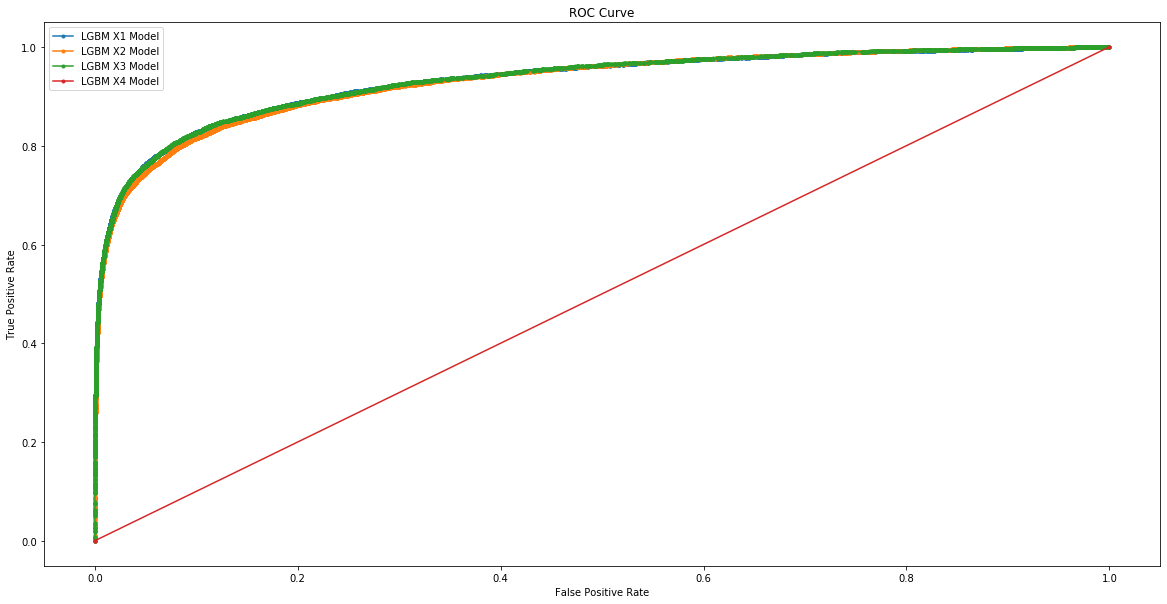

In [49]:
# plot ROC curve across models
plt.figure(figsize=(20, 10))
plt.plot(m1_frp, m1_tpr, marker = '.', label='LGBM X1 Model')
plt.plot(m2_frp, m2_tpr, marker = '.', label='LGBM X2 Model')
plt.plot(m3_frp, m3_tpr, marker = '.', label='LGBM X3 Model')
plt.plot(m4_frp, m4_tpr, marker = '.', label='LGBM X4 Model')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()